# F1 Calendar Optimization Using the CVTSP Method

The Carrier Vehicle Travelling Salesman Problem is an extension of the classic Travelling Salesman Problem. In this method, ESG emissions are minimized simultaneously with the maximization of revenue and rating. This represents a much more difficult way of solving the use case of F1 calendar optimization, as the algorithm must schedule the optimal circuits at the same time as it selects which 21 of the 30 circuits to include in the calendar. The complexity of this algorithm is beyond the scope of the course. It was not taken as the final solution to the use case as the constraints were not formulated correctly. Nevertheless, this code demonstrates a different - and arguably more correct - method to solving the mandate.

In [1]:
import gurobipy as gp
from gurobipy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Preparing the Data

In [2]:
#Create CO2 Emissions dataframe for visualization
co2data=pd.read_excel("Final Project Data.xlsx", sheet_name="CO2 Emissions Matrix")
trackdata=pd.read_excel("Final Project Data.xlsx", sheet_name="F1 Track Data")
data2019=pd.read_excel("Final Project Data.xlsx", sheet_name="2019 Season Data")

co2matrix=co2data.iloc[2:,0:]
travelcities=list(trackdata.iloc[0:30,4])
columnnames=list(trackdata.iloc[0:30,4])
columnnames.insert(0, "Cities")
co2df=pd.DataFrame(co2matrix)
co2df.columns=columnnames 

In [3]:
#Data for Tour Specifications
n=len(travelcities)
N=[i for i in range(1,n)] #list of numbered cities
V=[0]+N #list of city indexes
A=[(i,j) for i in V for j in V if i!=j] #matrix of city-to-city arcs
Q1=21 #maximum races per tour
q = {i: 1 for i in N} #each race visited counts for 1

In [4]:
#Create CO2 Emissions Dictionary for Computation
co2array=np.array(co2df.iloc[:,1:])
co2dict={(i,j):round(co2array[i][j],2) for i,j in A if i!=j}
co2dictwnames={(i,j):round(co2array[travelcities.index(i)][travelcities.index(j)],2) for i in travelcities for j in travelcities if i!=j}

In [5]:
#Revenue Data
gprevenues=list(trackdata.iloc[0:30, 5])
revenuedict=dict(zip(travelcities,gprevenues))

In [6]:
#Fan Rating Data
gpratings=list(trackdata.iloc[0:30, 6])
ratingdict=dict(zip(travelcities, gpratings))

In [7]:
#GP Data
gpnames=list(trackdata.iloc[0:30, 0])
gpnamedict=dict(zip(travelcities, gpnames))

In [8]:
#Host City Data
hostcities=list(trackdata.iloc[0:30, 3])
hostcitiesdict=dict(zip(travelcities, hostcities))

In [9]:
#Host Country Data
hostcountries=list(trackdata.iloc[0:30, 2])
hostcountriesdict=dict(zip(travelcities, hostcountries))

In [10]:
#2019 Season Data
co22019=round(data2019.iloc[25,7]/1000000,1) #Total emissions from 2019
rev2019=data2019.iloc[52,3]
rat2019=round(data2019.iloc[52,7],2)

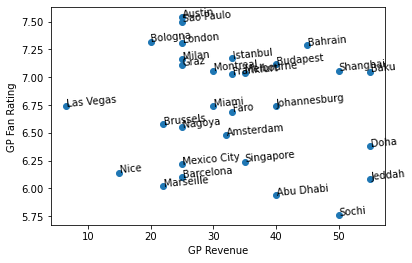

In [11]:
#Visualizing Plot cities on (x,y) where (fan rating, revenue)
fig, ax = plt.subplots()
ax.scatter(gprevenues, gpratings)

for i in range(n):
    ax.annotate(travelcities[i], (gprevenues[i], gpratings[i]), rotation=5)
plt.xlabel("GP Revenue")
plt.ylabel("GP Fan Rating")

plt.show()

### Part 2: Model Implementation

In [12]:
model=gp.Model("Formula One Problem")
model.Params.MIPGap = 0.1

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-17
Set parameter MIPGap to value 0.1


In [13]:
x = model.addVars(n,n, vtype=GRB.BINARY, name=[str(i)+" to "+str(j) for i in travelcities for j in travelcities])
u = model.addVars(V, vtype=GRB.CONTINUOUS)

In [14]:
model.setObjective(quicksum(x[i, j]*co2dict[i, j] for i, j in A), GRB.MINIMIZE)

In [15]:
model.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
model.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
model.addConstrs((x[i, j] == 1) >> (u[i]+q[i] == u[j]) for i, j in A if i != 0 and j != 0)
model.addConstrs(u[i] >= q[i] for i in N)
model.addConstrs(u[i] <= Q1 for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [16]:
model.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 116 rows, 930 columns and 1740 nonzeros
Model fingerprint: 0x565a1399
Model has 812 general constraints
Variable types: 30 continuous, 900 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+04, 3e+07]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 1894 rows and 336 columns
Presolve time: 0.09s
Presolved: 2010 rows, 1266 columns, 12241 nonzeros
Variable types: 396 continuous, 870 integer (870 binary)
Found heuristic solution: objective 2.907413e+08

Root relaxation: objective 3.822238e+07, 126 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


In [17]:
for v in model.getVars():
    if v.x>0.1:
        print(v.VarName, v.x)

Abu Dhabi to Bologna 1.0
Abu Dhabi to Jeddah 1.0
Amsterdam to Brussels 1.0
Austin to Miami 1.0
Bahrain to Doha 1.0
Baku to Abu Dhabi 1.0
Barcelona to London 1.0
Bologna to Milan 1.0
Brussels to Frankfurt 1.0
Budapest to Istanbul 1.0
Doha to Abu Dhabi 1.0
Faro to Barcelona 1.0
Frankfurt to Bahrain 1.0
Graz to Budapest 1.0
Istanbul to Sochi 1.0
Jeddah to Johannesburg 1.0
Johannesburg to Singapore 1.0
Las Vegas to Austin 1.0
London to Amsterdam 1.0
Marseille to Nice 1.0
Melbourne to Nagoya 1.0
Mexico City to Las Vegas 1.0
Miami to Montreal 1.0
Milan to Marseille 1.0
Montreal to Sao Paulo 1.0
Nagoya to Shanghai 1.0
Nice to Graz 1.0
Sao Paulo to Faro 1.0
Shanghai to Mexico City 1.0
Singapore to Melbourne 1.0
Sochi to Baku 1.0
C901 15.99999999999999
C902 8.999999999999993
C903 18.999999999999996
C904 9.0
C905 13.999999999999991
C906 1.0
C907 16.999999999999993
C908 6.0
C909 19.999999999999993
C910 12.999999999999991
C911 17.999999999999993
C912 5.0
C913 7.0
C914 1.0
C915 1.999999999999993
C9

### Part 3: Understanding the Solution

In [18]:
finalvalues=[]
for v in model.getVars():
    if v.x>0.1:
        finalvalues.append(v.VarName)

#Extract the city decision variables        
finalcityvalues=finalvalues[0:32] 

citypairs=[]

#Create a list of city pairings
for i in range(len(finalcityvalues)): 
    citypairs.append(finalcityvalues[i].split(" to "))

In [19]:
tour1=[]
tour2=[]

#Cities in tour 1
tour1.append(citypairs[0][1])

while tour1[-1]!="Abu Dhabi":
    cc=tour1[-1]
    for i in range(1,(len(citypairs))):
        if citypairs[i][0]==cc:
            tour1.append(citypairs[i][1])
            
tour1.pop()
tour1.insert(0, "Abu Dhabi")

#Cities in tour 2 
tour2.append(citypairs[1][1])
while tour2[-1]!="Abu Dhabi":
    for i in range(len(citypairs)):
        if citypairs[i][0]==tour2[-1]:
            tour2.append(citypairs[i][1])

            
tour2.pop()
tour2.insert(0, "Abu Dhabi")
            
#we focus on tour 1 and discard tour 2
if len(tour2)>len(tour1):
    tour1=tour2

In [20]:
l=len(tour1)

#Individual emissions from tour 1 legs
tour1co2sum=0
tour1co2list=[]
for i in range(0,l-1):
    c1=tour1[i]
    c2=tour1[i+1]
    tour1co2list.append(round(co2dictwnames[(c1,c2)]))
    tour1co2sum+=round(co2dictwnames[(c1,c2)])
tour1co2list.insert(0,"Start")
tour1co2sum=round((tour1co2sum/1000000),1)

#Revenue from tour 1
tour1revsum=0
tour1revlist=[]
for city in tour1:
    tour1revsum+=revenuedict[city]
    tour1revlist.append(revenuedict[city])

#Rating of tour 1
tour1ratsum=0
tour1ratlist=[]
for city in tour1:
    tour1ratsum+=ratingdict[city]
    tour1ratlist.append(ratingdict[city])
tour1rat=tour1ratsum/21

#Tour 1 by GP name
tour1gplist=[]
for city in tour1:
    tour1gplist.append(gpnamedict[city])

#Tour 1 Host Cities
tour1hostcities=[]
for city in tour1:
    tour1hostcities.append(hostcitiesdict[str(city)])

#Tour 1 Host Countries
tour1hostcountries=[]
for city in tour1:
    tour1hostcountries.append(hostcountriesdict[city])

In [21]:
#Visualizing the solution
tour1df=pd.DataFrame(list(zip(tour1hostcountries, tour1hostcities, tour1,tour1co2list, tour1revlist,tour1ratlist)), index=tour1gplist, columns=["Host Country", "Host City","Travel City", "Emissions From Leg (kg CO2)","Revenue from GP", "GP Rating"])
tour1df

,Host Country,Host City,Travel City,Emissions From Leg (kg CO2),Revenue from GP,GP Rating
Abu Dhabi Grand Prix,United Arab Emirates,Abu Dhabi,Abu Dhabi,Start,40.0,5.94
Saudi Arabia Grand Prix,Saudi Arabia,Jeddah,Jeddah,938133,55.0,6.08
South African Grand Prix,South Africa,Johannesburg,Johannesburg,3069893,40.0,6.74
Singapore Grand Prix,Singapore,Singapore,Singapore,5986620,35.0,6.24
Australian Grand Prix,Australia,Melbourne,Melbourne,5428172,35.0,7.04
Japanese Grand Prix,Japan,Nagoya,Nagoya,5687772,25.0,6.55
Chinese Grand Prix,China,Shanghai,Shanghai,749110,50.0,7.06
Mexican Grand Prix,Mexico,Mexico City,Mexico City,5264927,25.0,6.22
Las Vegas Grand Prix,United States,Las Vegas,Las Vegas,1133220,6.5,6.74
United States Grand Prix,United States,Austin,Austin,799699,25.0,7.54


In [22]:
#Final metrics
co2metric=round(((tour1co2sum-co22019)/co22019)*100,1)
if co2metric>0:
    co2improve="increase"
else:
    co2improve="decrease"
    
revmetric=round((((tour1revsum-rev2019)/rev2019)*100),1)
if revmetric>0:
    revimprove="increase"
else:
    revimprove="decrease"
    
ratmetric=round(((tour1rat-rat2019)/rat2019)*100,1)
if ratmetric>0:
    ratimprove="increase"
else:
    ratimprove="decrease"
    
    
print("There are "+str(l)+" races in this calendar.")

print("\nThe total amount of emissions generated from this calendar is "+str(tour1co2sum)+" million kg of CO2.")
print("This is a "+str(abs(co2metric))+"% "+co2improve+" from the 2019 calendar.")

print("\nThe total revenue generated from this calendar is $"+str(tour1revsum) +" million dollars USD.")
print("This is a "+str(abs(revmetric))+"% "+revimprove+" from the 2019 calendar.")

print("\nThe fan rating for this calendar is "+str(round(tour1rat,2))+".")
print("This is a "+str(abs(ratmetric))+"% "+ratimprove+" from the 2019 calendar.")

There are 21 races in this calendar.

The total amount of emissions generated from this calendar is 45.8 million kg of CO2.
This is a 60.3% decrease from the 2019 calendar.

The total revenue generated from this calendar is $691.5 million dollars USD.
This is a 1.8% increase from the 2019 calendar.

The fan rating for this calendar is 6.73.
This is a 0.3% decrease from the 2019 calendar.


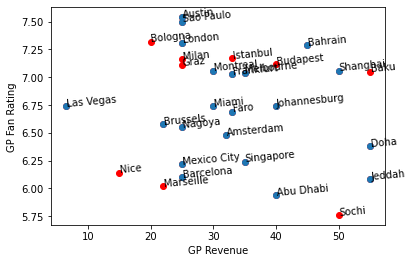

In [23]:
#Plot final cities on (x,y) where (fan rating, revenue)
fig, ax = plt.subplots()
ax.scatter(gprevenues, gpratings, color = 'red')

ax.scatter(tour1revlist,tour1ratlist)


for i in range(len(travelcities)):
    ax.annotate(travelcities[i], (gprevenues[i], gpratings[i]), rotation=5)
plt.xlabel("GP Revenue")
plt.ylabel("GP Fan Rating")

plt.show()